**Project Objective:** The objective of the project is to evaluate several classifiers on a chosen dataset.

**Selected Dataset:** Heart Disease Dataset (https://www.kaggle.com/redwankarimsony/heart-disease-data)

**Selected Classifiers:** Decision Trees, Naive Bayes, k-Nearest Neighbors (for k = 3 and 8), Random Forest, Logistic Regression

**Column Descriptions:**
- **id:** unique id for each patient
- **age:** age of the patient (in years)
- **dataset:** place of study [Cleveland, Hungary, VA Long Beach, Switzerland]
- **sex**: male/demale
- **cp** chest pain type [typical angina, atypical angina, non-anginal, asymptomatic]
- **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
- **chol** cholesterol level (in mg/dl)
- **fbs:** fasting blood glucose level > 120 mg/dl (True/ False)
- **restecg:** resting electrocardiographic results [normal, stt abnormality, lv hypertrophy]
- **thalach:** maximum heart rate achieved
- **exang:** exercise-induced angina (True/ False)
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** the slope of the peak exercise ST segment
- **ca:** number of major vessels (0-3) colored by fluoroscopy
- **thal:** presence of thalassaemia" (blood disorder) [normal; fixed defect; reversible defect]
- **num:** the predicted attribute the diagnosis of heart disease: (0 - no disease, 1-4 - various stages of the disease)

In [138]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [139]:
d = pd.read_csv('heart_disease_uci.csv')
d.isnull().any()
d = d.dropna()

In [140]:
d.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [141]:
# types
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [142]:
# categorical encoding for: sex, dataset, cp, restecg, slope, thal

d['sex'] = d['sex'].replace('Male',0)
d['sex'] = d['sex'].replace('Female',1)

d['dataset'] = d['dataset'].replace('Cleveland',1)
d['dataset'] = d['dataset'].replace('Hungary',2)
d['dataset'] = d['dataset'].replace('VA Long Beach',3)
d['dataset'] = d['dataset'].replace('Switzerland',4)

d['cp'] = d['cp'].replace('typical angina',1)
d['cp'] = d['cp'].replace('atypical angina',2)
d['cp'] = d['cp'].replace('non-anginal',3)
d['cp'] = d['cp'].replace('asymptomatic',4)

d['restecg'] = d['restecg'].replace('normal',1)
d['restecg'] = d['restecg'].replace('st-t abnormality',2)
d['restecg'] = d['restecg'].replace('lv hypertrophy',3)

d['slope'] = d['slope'].replace('upsloping',1)
d['slope'] = d['slope'].replace('flat',2)
d['slope'] = d['slope'].replace('downsloping',3)

d['thal'] = d['thal'].replace('normal',1)
d['thal'] = d['thal'].replace('fixed defect',2)
d['thal'] = d['thal'].replace('reversable defect',3)


# binary encoding for fbs,exang
d['fbs'] = (d['fbs']).astype(int)
d['exang'] = (d['exang']).astype(int)

# replacing values 2, 3, and 4 with 1 in the 'num' column, indicating the presence of heart disease.
d['num'] = d['num'].replace(2,1)
d['num'] = d['num'].replace(3,1)
d['num'] = d['num'].replace(4,1)

In [143]:
d.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,0,1,1,145.0,233.0,1,3,150.0,0,2.3,3,0.0,2,0
1,2,67,0,1,4,160.0,286.0,0,3,108.0,1,1.5,2,3.0,1,1
2,3,67,0,1,4,120.0,229.0,0,3,129.0,1,2.6,2,2.0,3,1
3,4,37,0,1,3,130.0,250.0,0,1,187.0,0,3.5,3,0.0,1,0
4,5,41,1,1,2,130.0,204.0,0,3,172.0,0,1.4,1,0.0,1,0


In [144]:
# types
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 748
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    int64  
 3   dataset   299 non-null    int64  
 4   cp        299 non-null    int64  
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    int64  
 8   restecg   299 non-null    int64  
 9   thalch    299 non-null    float64
 10  exang     299 non-null    int64  
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    int64  
 13  ca        299 non-null    float64
 14  thal      299 non-null    int64  
 15  num       299 non-null    int64  
dtypes: float64(5), int64(11)
memory usage: 39.7 KB


In [145]:
d.shape[0]

299

In [146]:
print('Minimum age:', min(d['age']))
print('Maximum age:', max(d['age']))
print('Average age:', round(np.mean(d['age'])))
print('Minimum blood pressure:', min(d['trestbps']))
print('Maximum blood pressure:', max(d['trestbps']))
print('Average blood pressure:', round(np.mean(d['trestbps'])))
print('Minimum cholesterol level:', min(d['chol']))
print('Maximum cholesterol level:', max(d['chol']))
print('Average cholesterol level:', round(np.mean(d['chol'])))
print('Minimum heart rate:', min(d['thalch']))
print('Maximum heart rate:', max(d['thalch']))
print('Average heart rate:', round(np.mean(d['thalch'])))
print('Minimum ST depression induced by exercise relative to rest:', min(d['oldpeak']))
print('Maximum ST depression induced by exercise relative to rest:', max(d['oldpeak']))
print('Average ST depression induced by exercise relative to rest:', round(np.mean(d['oldpeak'])))


Minimum age: 29
Maximum age: 77
Average age: 55
Minimum blood pressure: 94.0
Maximum blood pressure: 200.0
Average blood pressure: 132
Minimum cholesterol level: 100.0
Maximum cholesterol level: 564.0
Average cholesterol level: 247
Minimum heart rate: 71.0
Maximum heart rate: 202.0
Average heart rate: 149
Minimum ST depression induced by exercise relative to rest: 0.0
Maximum ST depression induced by exercise relative to rest: 6.2
Average ST depression induced by exercise relative to rest: 1


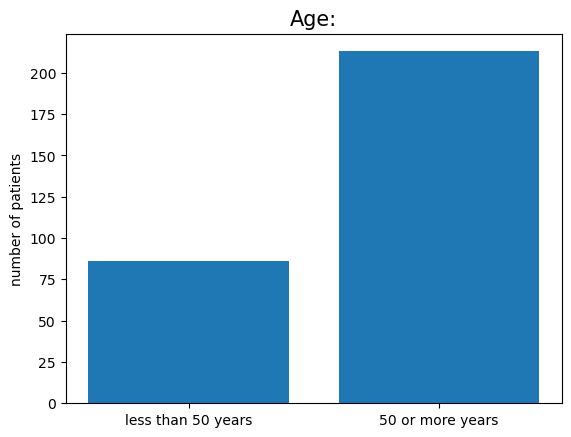

In [147]:
#age
under50 = 0
uppereq50 = 0
age = (d['age'])
for i in age:
    if i < 50:
        under50 = under50+1
    else:
        uppereq50 = uppereq50 +1
v = ('less than 50 years', '50 or more years')
l = (under50,uppereq50)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Age:', size = 15)
plt.show()

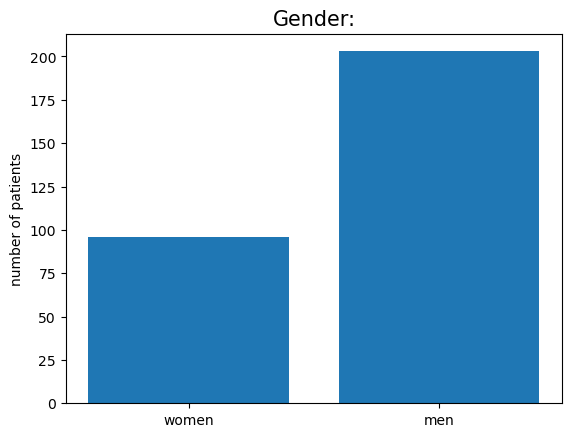

In [148]:
#sex
male = sum(d['sex'])
female = len(d) - male
v = ('women', 'men')
l = (male,female)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Gender:', size = 15)
plt.show()

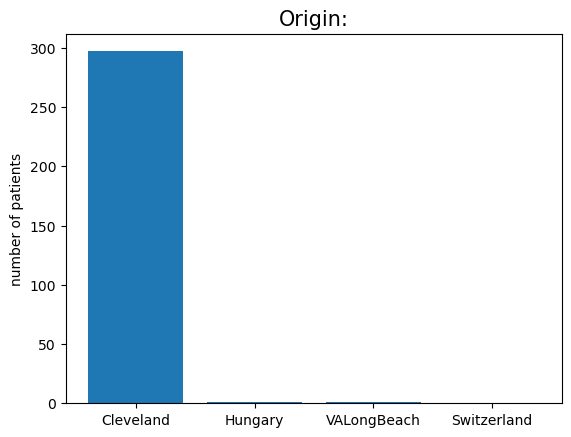

In [149]:
#dataset
C = 0
H = 0
V = 0
S =0
dataset = (d['dataset'])
for i in dataset:
    if i == 1:
        C = C + 1
    elif i == 2:
        H = H + 1
    elif i == 3:
        V = V + 1
    elif i == 4:
        S = S + 1
v = ('Cleveland', 'Hungary', 'VALongBeach', 'Switzerland')
l = (C,H,V,S)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Origin:', size = 15)
plt.show()

In [150]:
d = d.drop('dataset', axis=1)

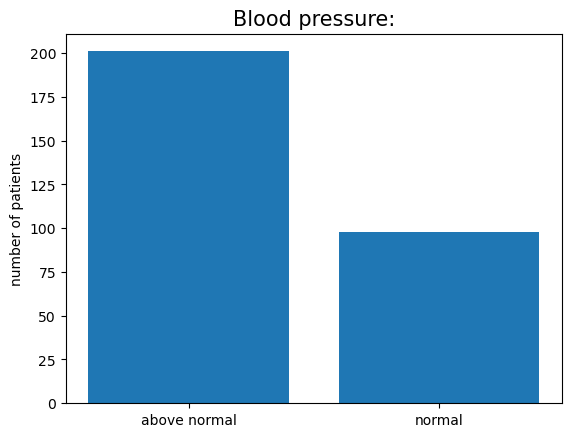

In [151]:
#trestbps
morethan120 = 0
eqless = 0
trestbps = (d['trestbps'])
for i in trestbps:
    if i <= 120:
        eqless = eqless + 1
    elif i > 120:
        morethan120  = morethan120 +1

v = ('above normal', 'normal')
l = (morethan120,eqless)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Blood pressure:', size = 15)
plt.show()

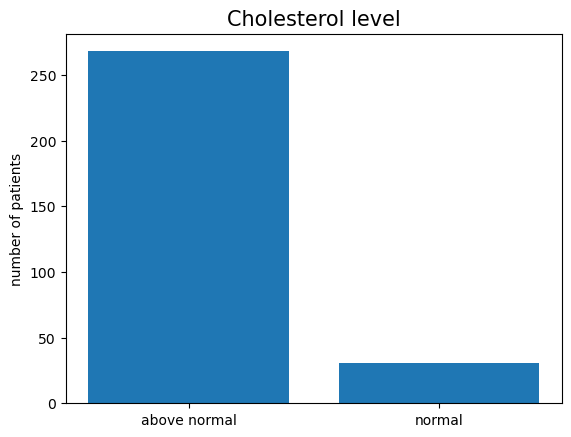

In [152]:
#chol 
good = 0
bad = 0
for i in d['chol']:
    if i >= 190:
        bad = bad + 1
    elif i < 190:
        good  = good +1
v = ('above normal', 'normal')
l = (bad,good)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Cholesterol level', size = 15)
plt.show()


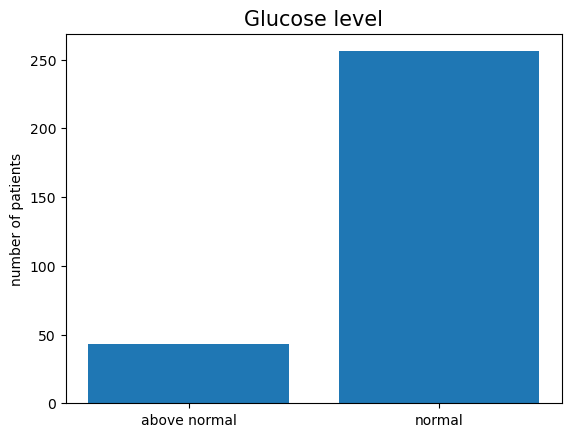

In [153]:
#fbs 
a = 0
b = 0
for i in d['fbs']:
    if i == 0:
        a = a + 1
    elif i == 1:
        b = b + 1
v = ('above normal', 'normal')
l = (b,a)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Glucose level', size = 15)
plt.show()

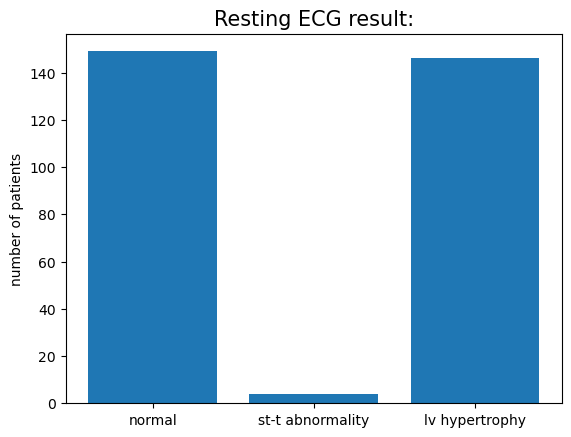

In [154]:
#restecg 
a = 0
b = 0
c = 0
for i in d['restecg']:
    if i == 1:
        a = a + 1
    elif i == 2:
        b = b + 1
    elif i == 3:
        c = c + 1
v = ('normal', 'st-t abnormality', 'lv hypertrophy')
l = (a,b,c)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Resting ECG result:', size = 15)
plt.show()

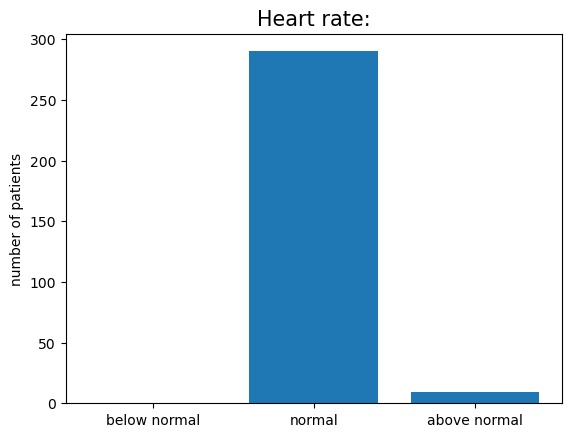

In [155]:
#thalach: 
a = 0
b = 0
c = 0

for i in d['thalch']:
    if i <60:
        a = a+1
    elif i > 100:
        b = b+1
    else:
        c = c+1

v = ('below normal', 'normal','above normal')
l = (a,b,c)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Heart rate:', size = 15)
plt.show()


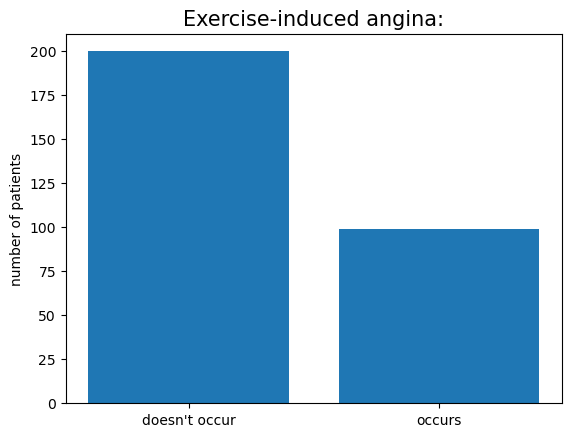

In [156]:
#exang: 
a = 0
b = 0
for i in d['exang']:
    if i == 0:
        a = a + 1
    elif i == 1:
        b = b + 1
v = ('doesn\'t occur', 'occurs')
l = (a,b)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Exercise-induced angina:', size = 15)
plt.show()

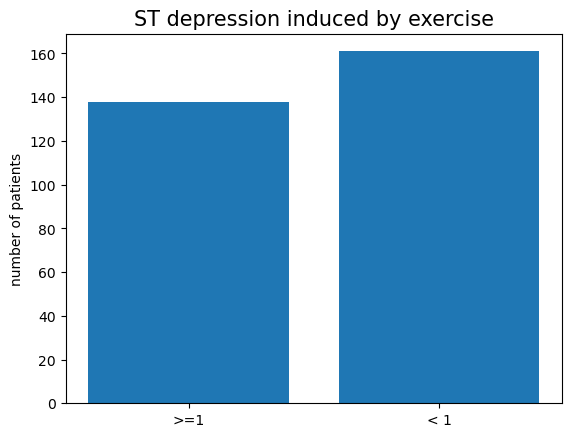

In [157]:
#oldpeak: 
a = 0
b = 0
for i in d['oldpeak']:
    if i >= 1:
        a = a+1
    else:
        b = b+1
v = ('>=1', '< 1')
l = (a,b)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('ST depression induced by exercise', size = 15)
plt.show()  

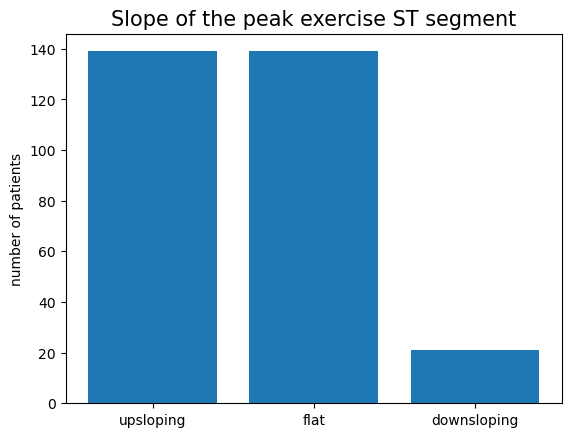

In [158]:
#slope: 
a = 0
b = 0
c = 0
for i in d['slope']:
    if i == 1:
        a = a + 1
    elif i == 2:
        b = b + 1
    elif i == 3:
        c = c + 1
v = ('upsloping', 'flat','downsloping')
l = (a,b,c)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Slope of the peak exercise ST segment', size = 15)
plt.show()

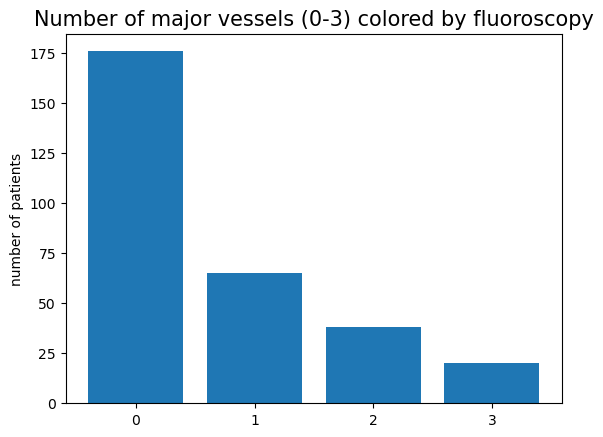

In [159]:
#ca:    
a = 0
b = 0
c = 0
e = 0
for i in d['ca']:
    if i == 0:
        a = a + 1
    elif i == 1:
        b = b + 1
    elif i == 2:
        c = c + 1
    elif i == 3:
        e = e + 1
v = ('0', '1','2','3')
l = (a,b,c,e)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Number of major vessels (0-3) colored by fluoroscopy', size = 15)
plt.show()

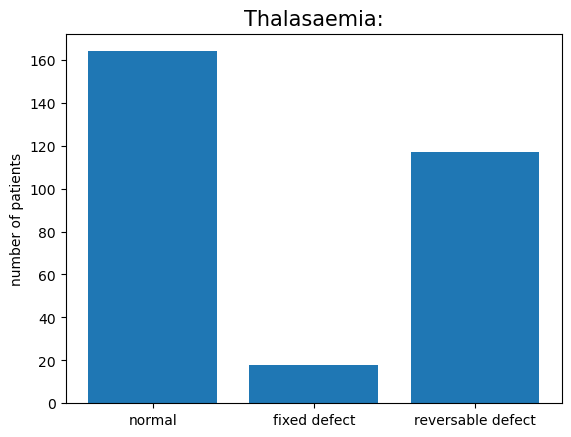

In [160]:
#thal:
a = 0
b = 0
c = 0
for i in d['thal']:
    if i == 1:
        a = a + 1
    elif i == 2:
        b = b + 1
    elif i == 3:
        c = c + 1
v = ('normal', 'fixed defect','reversable defect')
l = (a,b,c)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Thalasaemia:', size = 15)
plt.show()    

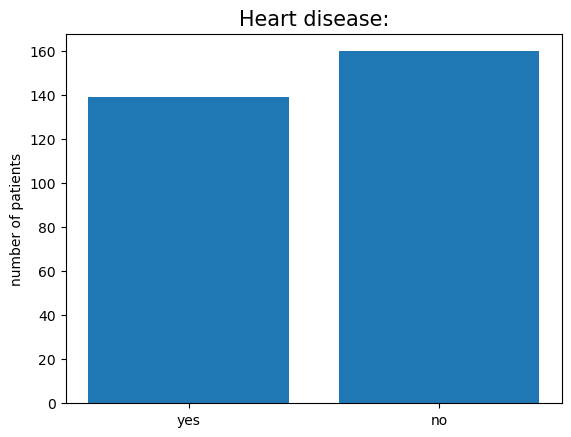

In [161]:
#num:  
a = 0
b = 0
for i in d['num']:
    if i == 0:
        a = a + 1
    elif i == 1:
        b = b + 1     
v = ('yes', 'no')
l = (b,a)
plt.bar(v, l)
plt.xticks(v,rotation = 0)
plt.ylabel('number of patients')
plt.title('Heart disease:', size = 15)
plt.show()  
 

In [162]:
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [163]:
# splitting the data into training and testing sets
X = d.drop(columns=['num'])
y = d['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [164]:
#tree
t = sk.tree.DecisionTreeClassifier() 
t.fit(X_train, y_train) 
score_t = t.score(X_test, y_test) 
print(f'Decission tree score: {round(score_t,2)}')

Decission tree score: 0.76


In [165]:
#gaussian naive bayes
nv = GaussianNB()
nv.fit(X_train, y_train.values.ravel())
score_nv = nv.score(X_test, y_test) 
print(f'Gaussian Naibve Bayes score: {round(score_nv,2)}')

Gaussian Naibve Bayes score: 0.81


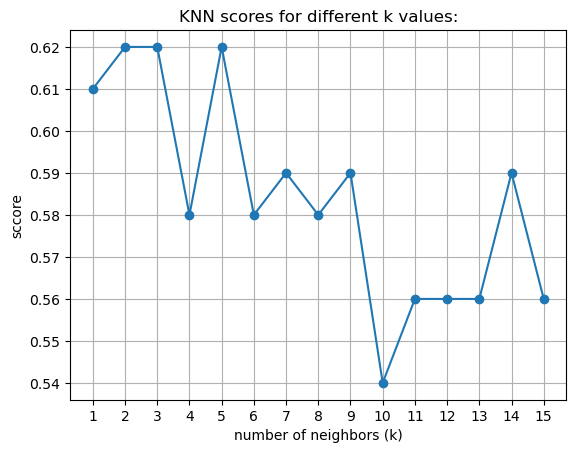

In [166]:
#knn
k_values = range(1,16)
knn_scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    knn_scores.append(round(score,2))
    
plt.plot(k_values, knn_scores, marker='o', linestyle='-')
plt.title('KNN scores for different k values:')
plt.xlabel('number of neighbors (k)')
plt.ylabel('sccore')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()

In [167]:
#KNN k = 3
k3= KNeighborsClassifier(n_neighbors=3)
k3.fit(X_train, y_train.values.ravel())
score_k3 = k3.score(X_test, y_test) 

print(f' 3 Nearest Neighbors score: {round(score_k3,2)}')

 3 Nearest Neighbors score: 0.62


In [168]:
rf = RandomForestClassifier() 
rf.fit(X_train, y_train)
score_rf = rf.score(X_test, y_test)
print(f'Random forest score: {round(score_k3,2)}')

Random forest score: 0.62


In [169]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
score_lr = lr.score(X_test, y_test) 

In [170]:
print(f'Logistic regression score: {round(score_lr,2)}')

Logistic regression score: 0.8


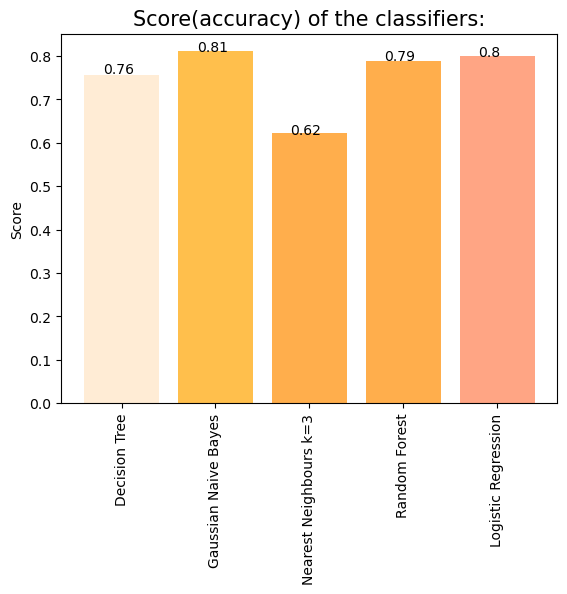

In [171]:
#Model comparison

s = [] 
s.append(score_t)
s.append(score_nv)
s.append(score_k3)
s.append(score_rf)
s.append(score_lr)

models = ('Decision Tree', 'Gaussian Naive Bayes', 'Nearest Neighbours k=3',
          'Random Forest','Logistic Regression')
l = np.arange(len(models))
plt.bar(l, s, color = ('bisque', 'orange', 'darkorange','darkorange','coral','peachpuff'),alpha = 0.7)
plt.xticks(l, models,rotation = 90)
plt.ylabel('Score')
plt.title('Score(accuracy) of the classifiers:', size = 15)
sc = (round(score_t,2), round(score_nv,2), round(score_k3,2),round(score_rf,2),round(score_lr,2))
for i in range(len(sc)):
    plt.text(x = i-0.2 , y = sc[i], s = sc[i], size = 10)
plt.show()

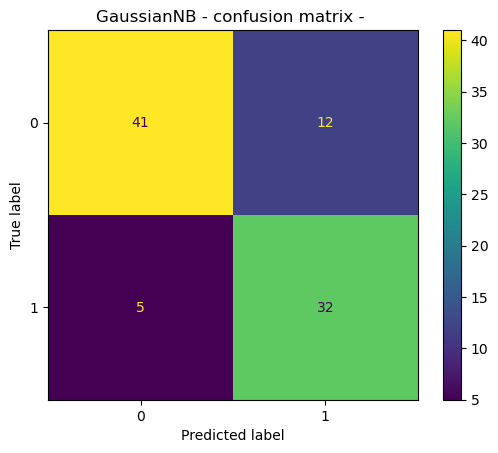

In [172]:
# confusion matrix for Gaussian Naive Bayes classifier:

m = plot_confusion_matrix(nv, X_test, y_test) 
m.ax_.set_title('GaussianNB - confusion matrix - ') 
plt.show()


In [173]:
print(f'Percentage of correctly classified records: {round((41+32)/(12+5+41+32),2)}')
print(f'Percentage of patients with disease occurrence but classified as absence: {round(5/(12+5+41+32),2)}')
print(f'Percentage of patients without disease occurrence but classified as presence: {round(12/(12+5+41+32),2)}')

Percentage of correctly classified records: 0.81
Percentage of patients with disease occurrence but classified as absence: 0.06
Percentage of patients without disease occurrence but classified as presence: 0.13


**Conclusions:**
- In the Heart Disease database, the Naive Bayes classifier performed best in predicting the occurrence of disease in patients, followed by logistic regression in second place. The k-nearest neighbors classifier performed the worst.
- The consequences of diagnosing the disease in a healthy person are less severe than failing to diagnose the disease in a sick person.
- A significant number of records were removed by deleting columns with NA values and the variable indicating the origin of data.